In [95]:
from knn_model import *
pd.set_option('display.max_columns', None)
%matplotlib inline

In [67]:
    df = pd.read_csv('../data/new_olympics_merged.csv', sep = '|',lineterminator='\n')
    df_clean = prep_for_knn(df)
    test,train = train_test_split(df_clean,2016)
    #get weather data
    keys = ['Global_sum_FIPS:53031 FIPS:53009.csv','Global_sum_FIPS:53045 FIPS:53027.csv']
    df_weather = import_weather(keys)
    df_weather_dist = df_weather[['LATITUDE','LONGITUDE','name']].drop_duplicates().reset_index()
    #add feature columns

In [68]:
test

Date  last_year  year  condition|snow  condition|trail  \
0     2018-05-06       2017  2018            True             True   
1     2018-05-05       2017  2018           False             True   
2     2018-05-05       2017  2018            True             True   
3     2018-04-25       2017  2018            True             True   
4     2018-04-22       2017  2018           False             True   
5     2018-04-21       2017  2018            True            False   
6     2018-04-21       2017  2018           False            False   
7     2018-04-20       2017  2018            True             True   
8     2018-04-20       2017  2018            True             True   
9     2018-04-19       2017  2018            True             True   
10    2018-04-18       2017  2018            True             True   
11    2018-04-03       2017  2018            True             True   
12    2018-04-01       2017  2018            True            False   
13    2018-03-30       2017  2018            True             True   
14    2018-03-24       2017  2018            True             True   
15    2018-03-18       2017  2018            True             True   
16    2018-03-17       2017  2018            True             True   
17    2018-03-03       2017  2018           False            False   
18    2018-02-24       2017  2018            True             True   
19    2018-02-20       2017  2018            True             True   
20    2018-02-03       2017  2018            True             True   
21    2018-01-20       2017  2018            True            False   
22    2018-01-15       2017  2018            True            False   
23    2018-01-06       2017  2018            True            False   
24    2017-12-12       2016  2017            True             True   
25    2017-11-26       2016  2017           False             True   
26    2017-11-05       2016  2017            True            False   
27    2017-10-29       2016  2017           False            False   
28    2017-09-28       2016  2017           False            False   
29    2017-09-09       2016  2017           False            False   
...          ...        ...   ...             ...              ...   
12228 2016-04-17       2015  2016           False             True   
12229 2016-04-16       2015  2016           False             True   
12230 2016-04-12       2015  2016           False             True   
12231 2016-04-10       2015  2016           False             True   
12232 2016-04-10       2015  2016           False             True   
12233 2016-04-03       2015  2016           False             True   
12234 2016-04-01       2015  2016           False             True   
12235 2016-04-01       2015  2016           False             True   
12236 2016-03-31       2015  2016           False            False   
12237 2016-03-29       2015  2016           False             True   
12238 2016-03-27       2015  2016           False             True   
12239 2016-03-26       2015  2016           False             True   
12240 2016-03-25       2015  2016           False             True   
12241 2016-03-20       2015  2016           False             True   
12242 2016-03-20       2015  2016           False             True   
12243 2016-03-18       2015  2016           False             True   
12244 2016-03-16       2015  2016           False             True   
12245 2016-03-12       2015  2016           False             True   
12246 2016-03-06       2015  2016           False            False   
12247 2016-03-05       2015  2016           False            False   
12248 2016-02-28       2015  2016           False            False   
12249 2016-02-27       2015  2016           False            False   
12250 2016-02-03       2015  2016           False             True   
12251 2016-01-30       2015  2016           False             True   
12252 2016-01-26       2015  2016           False             True   
12253 2016-01-20      

In [73]:
conditions = ['condition|snow', 'condition|trail','condition|bugs','condition|road']
for condition in conditions:
    df = pd.read_csv('../data/new_olympics_merged.csv', sep = '|',lineterminator='\n')
    df_clean = prep_for_knn(df)
    test,train = train_test_split(df_clean,2016)
    #get weather data
    keys = ['Global_sum_FIPS:53031 FIPS:53009.csv','Global_sum_FIPS:53045 FIPS:53027.csv']
    df_weather = import_weather(keys)
    df_weather_dist = df_weather[['LATITUDE','LONGITUDE','name']].drop_duplicates().reset_index()
    
    add_cols(test,train, df_weather_dist,condition)
    #merge and save full df
    df_test = merge_weather_trails(df_weather,test)
    df_train = merge_weather_trails(df_weather,train)
    train_X,train_y,test_X,test_y = get_knn_inputs(df_test,df_train,condition)
    model,pred = make_forest(train_X,train_y,test_X,test_y)
    
    y_true = test_y
    y_pred = pred[:,1]

    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    area_under_curve = auc(fpr, tpr)
    print (condition, area_under_curve)

#     # method I: plt
#     fig, ax = plt.subplots()
#     plt.title(f'Receiver Operating Characteristic - {condition}')
#     ax.plot(fpr, tpr, 'k', label = 'C AUC = %0.3f' % area_under_curve)

#     ax.legend(loc = 'lower right')
#     ax.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()
    test.drop([f'neighbors_average {condition}'],axis=1)
    train.drop([f'neighbors_average {condition}'],axis=1)

/Users/ashley/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/ashley/projects/Trail_Report/src/knn_model.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[f'neighbors_average {condition}'] = averages
/Users/ashley/projects/Trail_Report/src/Cleaning/Merge_Weather.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

condition|snow 0.7750654881


/Users/ashley/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/ashley/projects/Trail_Report/src/knn_model.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[f'neighbors_average {condition}'] = averages
/Users/ashley/projects/Trail_Report/src/Cleaning/Merge_Weather.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

condition|trail 0.618662898717


/Users/ashley/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/ashley/projects/Trail_Report/src/knn_model.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[f'neighbors_average {condition}'] = averages
/Users/ashley/projects/Trail_Report/src/Cleaning/Merge_Weather.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

condition|bugs 0.701646849027


/Users/ashley/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/ashley/projects/Trail_Report/src/knn_model.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[f'neighbors_average {condition}'] = averages
/Users/ashley/projects/Trail_Report/src/Cleaning/Merge_Weather.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

condition|road 0.689008013862


In [21]:
model,pred = make_forest(train_X,train_y,test_X,test_y)
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

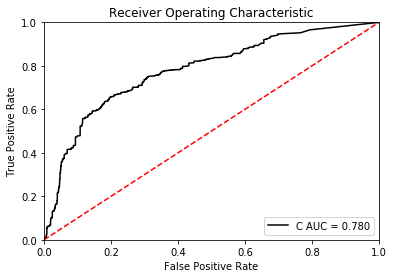

In [22]:
y_true = test_y
y_pred = pred[:,1]

fpr, tpr, threshold = roc_curve(y_true, y_pred)
area_under_curve = auc(fpr, tpr)

# method I: plt
fig, ax = plt.subplots()
plt.title('Receiver Operating Characteristic')
ax.plot(fpr, tpr, 'k', label = 'C AUC = %0.3f' % area_under_curve)

ax.legend(loc = 'lower right')
ax.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
feature_values = {}
for i in range(len(model.feature_importances_)):
   feature_values[test_X.columns[i]] = model.feature_importances_[i]

top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)
top_features

[('neighbors_average', 0.30159563381944338),
 ('month', 0.23499719875040045),
 ('highest_point', 0.028135668549925365),
 ('elevation_gain', 0.023615252472676578),
 ('long', 0.018999243320777657),
 ('total_distance', 0.017861115134421599),
 ('lat', 0.017653445156102624),
 ('stars', 0.01712456075486795),
 ('numReports', 0.017115053311486404),
 ('DP01', 0.015899374022125226),
 ('number_votes', 0.015716333116401856),
 ('DP10', 0.013637146292816866),
 ('PRCP', 0.012218047784845363),
 ('EMXP', 0.010290690274848359),
 ('TMAX', 0.00895838773143285),
 ('HDSD', 0.0087387047871515973),
 ('HTDD', 0.0087193237195635192),
 ('DX70', 0.0080000027392653581),
 ('EMXT', 0.0067508993280005038),
 ('TAVG', 0.0061342448518979771),
 ('Ridges/passes', 0.0053079302337229661),
 ('FZF0', 0.0051620654885430692),
 ('Mountain views', 0.0051195780999764165),
 ('Wildflowers/Meadows', 0.0049216549208733361),
 ('Lakes', 0.0049154268071376879),
 ('Rivers', 0.0048925814389208537),
 ('Established campsites', 0.004694102299

In [30]:
conditions = ['condition|snow', 'condition|trail','condition|bugs',
    'condition|road']

In [31]:
conditon = 'condition|snow'

In [33]:
conditions.remove(conditon)

In [51]:
type(conditions)

list

In [52]:
more = ['test','this','one']
type(more+conditions)

list

In [71]:
conditions = ['condition|snow', 'condition|trail','condition|bugs','condition|road']
condition = 'condition|snow'

df = pd.read_csv('../data/new_olympics_merged.csv', sep = '|',lineterminator='\n')
df_clean = prep_for_knn(df)
test,train = train_test_split(df_clean,2016)
#get weather data
keys = ['Global_sum_FIPS:53031 FIPS:53009.csv','Global_sum_FIPS:53045 FIPS:53027.csv']
df_weather = import_weather(keys)
df_weather_dist = df_weather[['LATITUDE','LONGITUDE','name']].drop_duplicates().reset_index()

add_cols(test,train, df_weather_dist,'condition|snow')
#merge and save full df
df_test = merge_weather_trails(df_weather,test)
df_train = merge_weather_trails(df_weather,train)
train_X,train_y,test_X,test_y = get_knn_inputs(df_test,df_train,'condition|snow')
model,pred = make_forest(train_X,train_y,test_X,test_y)

y_true = test_y
y_pred = pred[:,1]

fpr, tpr, threshold = roc_curve(y_true, y_pred)
area_under_curve = auc(fpr, tpr)
print (condition, area_under_curve)

#     # method I: plt
#     fig, ax = plt.subplots()
#     plt.title(f'Receiver Operating Characteristic - {condition}')
#     ax.plot(fpr, tpr, 'k', label = 'C AUC = %0.3f' % area_under_curve)

#     ax.legend(loc = 'lower right')
#     ax.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()

/Users/ashley/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/ashley/projects/Trail_Report/src/knn_model.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[f'neighbors_average {condition}'] = averages
/Users/ashley/projects/Trail_Report/src/Cleaning/Merge_Weather.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

condition|snow 1.0


In [72]:
train_X

condition|snow  Anderson Lake State Park  Anderson Point  Appleton Pass  \
0               True                         0               0              0   
1               True                         0               0              0   
2               True                         0               0              0   
3              False                         0               0              0   
4              False                         0               0              0   
5              False                         0               0              0   
6              False                         0               0              0   
7              False                         0               0              0   
8              False                         0               0              0   
9              False                         0               0              0   
10             False                         0               0              0   
11             False                         0               0              0   
12             False                         0               0              0   
13             False                         0               0              0   
14             False                         0               0              0   
15             False                         0               0              0   
16             False                         0               0              0   
17             False                         0               0              0   
18             False                         0               0              0   
19             False                         0               0              0   
20             False                         0               0              0   
21             False                         0               0              0   
22             False                         0               0              0   
23              True                         0               0              0   
24             False                         0               0              0   
25             False                         0               0              0   
26             False                         0               0              0   
27             False                         0               0              0   
28             False                         0               0              0   
29             False                         0               0              0   
...              ...                       ...             ...            ...   
7133           False                         0               0              0   
7134           False                         0               0              0   
7135           False                         0               0              0   
7136            True                         0               0              0   
7137           False                         0               0              0   
7138           False                         0               0              0   
7139           False                         0               0              0   
7140            True                         0               0              0   
7141           False                         0               0              0   
7142           False                         0               0              0   
7143           False                         0               0              0   
7144           False                         0               0              0   
7145           False                         0               0              0   
7146           False                         0               0              0   
7147           False                         0               0              0   
7148           False                         0               0              0   
7149           False                         0               0              0   
7150            True                 

In [74]:
df

Unnamed: 0  Unnamed: 0_x  \
0               0             0   
1               1             1   
2               2             2   
3               3             3   
4               4             4   
5               5             5   
6               6             6   
7               7             7   
8               8             8   
9               9             9   
10             10            10   
11             11            11   
12             12            12   
13             13            13   
14             14            14   
15             15            15   
16             16            16   
17             17            17   
18             18            18   
19             19            19   
20             20            20   
21             21            21   
22             22            22   
23             23            23   
24             24            24   
25             25            25   
26             26            26   
27             27            27   
28             28            28   
29             29            29   
...           ...           ...   
12338       12338         12338   
12339       12339         12339   
12340       12340         12340   
12341       12341         12341   
12342       12342         12342   
12343       12343         12343   
12344       12344         12344   
12345       12345         12345   
12346       12346         12346   
12347       12347         12347   
12348       12348         12348   
12349       12349         12349   
12350       12350         12350   
12351       12351         12351   
12352       12352         12352   
12353       12353         12353   
12354       12354         12354   
12355       12355         12355   
12356       12356         12356   
12357       12357         12357   
12358       12358         12358   
12359       12359         12359   
12360       12360         12360   
12361       12361         12361   
12362       12362         12362   
12363       12363         12363   
12364       12364         12364   
12365       12365         12365   
12366       12366         12366   
12367       12367         12367   

                                                 Creator        Date  \
0                                            rustysailor  2018-05-06   
1                                               kilpatjw  2018-05-05   
2                                                jalaugh  2018-05-05   
3                                        Becuz Its There  2018-04-25   
4                                           Cloud Chaser  2018-04-22   
5                                             StepbyStep  2018-04-21   
6                                              tpioletti  2018-04-21   
7                                         Irene Grinberg  2018-04-20   
8                                         Irene Grinberg  2018-04-20   
9                                               Nicole A  2018-04-19   
10                                       Becuz Its There  2018-04-18   
11                                                olddog  2018-04-03   
12                                    Hike ALL The Hikes  2018-04-01   
13                                         sheasamaniego  2018-03-30   
14                                     Dragonmountaineer  2018-03-24   
15                                          McKean Evans  2018-03-18   
16                                              BeadLady  2018-03-17   
17                                              galaxyx_  2018-03-03   
18                                            reneeadele  2018-02-24   
19                                         Jeffrey Boyle  2018-02-20   
20                                          mountainmama  2018-02-03   
21                                               Doughew  2018-01-20   
22                                              miamoran  2018-01-15   
23                                                JV4395  2018-01-06   
24                                  

In [77]:
hike = 'Mount Rose'

In [78]:
df.loc[df['Trail'] == hike]

Unnamed: 0  Unnamed: 0_x  \
0             0             0   
1             1             1   
2             2             2   
3             3             3   
4             4             4   
5             5             5   
6             6             6   
7             7             7   
8             8             8   
9             9             9   
10           10            10   
11           11            11   
12           12            12   
13           13            13   
14           14            14   
15           15            15   
16           16            16   
17           17            17   
18           18            18   
19           19            19   
20           20            20   
21           21            21   
22           22            22   
23           23            23   
24           24            24   
25           25            25   
26           26            26   
27           27            27   
28           28            28   
29           29            29   
..          ...           ...   
240         240           240   
241         241           241   
242         242           242   
243         243           243   
244         244           244   
245         245           245   
246         246           246   
247         247           247   
248         248           248   
249         249           249   
250         250           250   
251         251           251   
252         252           252   
253         253           253   
254         254           254   
255         255           255   
256         256           256   
257         257           257   
258         258           258   
259         259           259   
260         260           260   
261         261           261   
262         262           262   
263         263           263   
264         264           264   
265         265           265   
266         266           266   
267         267           267   
268         268           268   
269         269           269   

                                             Creator        Date  \
0                                        rustysailor  2018-05-06   
1                                           kilpatjw  2018-05-05   
2                                            jalaugh  2018-05-05   
3                                    Becuz Its There  2018-04-25   
4                                       Cloud Chaser  2018-04-22   
5                                         StepbyStep  2018-04-21   
6                                          tpioletti  2018-04-21   
7                                     Irene Grinberg  2018-04-20   
8                                     Irene Grinberg  2018-04-20   
9                                           Nicole A  2018-04-19   
10                                   Becuz Its There  2018-04-18   
11                                            olddog  2018-04-03   
12                                Hike ALL The Hikes  2018-04-01   
13                                     sheasamaniego  2018-03-30   
14                                 Dragonmountaineer  2018-03-24   
15                                      McKean Evans  2018-03-18   
16                                          BeadLady  2018-03-17   
17                                          galaxyx_  2018-03-03   
18                                        reneeadele  2018-02-24   
19                                     Jeffrey Boyle  2018-02-20   
20                                      mountainmama  2018-02-03   
21                                           Doughew  2018-01-20   
22                                          miamoran  2018-01-15   
23                                            JV4395  2018-01-06   
24                                            olddog  2017-12-12   
25                                          Devrondo  2017-11-26   
26                                          weflybye  2017-11-05   
27                                            jWo980  

In [79]:
train_X

Anderson Lake State Park  Anderson Point  Appleton Pass  Aurora Creek  \
0                            0               0              0             0   
1                            0               0              0             0   
2                            0               0              0             0   
3                            0               0              0             0   
4                            0               0              0             0   
5                            0               0              0             0   
6                            0               0              0             0   
7                            0               0              0             0   
8                            0               0              0             0   
9                            0               0              0             0   
10                           0               0              0             0   
11                           0               0              0             0   
12                           0               0              0             0   
13                           0               0              0             0   
14                           0               0              0             0   
15                           0               0              0             0   
16                           0               0              0             0   
17                           0               0              0             0   
18                           0               0              0             0   
19                           0               0              0             0   
20                           0               0              0             0   
21                           0               0              0             0   
22                           0               0              0             0   
23                           0               0              0             0   
24                           0               0              0             0   
25                           0               0              0             0   
26                           0               0              0             0   
27                           0               0              0             0   
28                           0               0              0             0   
29                           0               0              0             0   
...                        ...             ...            ...           ...   
7133                         0               0              0             0   
7134                         0               0              0             0   
7135                         0               0              0             0   
7136                         0               0              0             0   
7137                         0               0              0             0   
7138                         0               0              0             0   
7139                         0               0              0             0   
7140                         0               0              0             0   
7141                         0               0              0             0   
7142                         0               0              0             0   
7143                         0               0              0             0   
7144                         0               0              0             0   
7145                         0               0              0             0   
7146                         0               0              0             0   
7147                         0               0              0             0   
7148                         0               0              0             0   
7149                         0               0              0             0   
7150                         0               0              0             0   
7151                         0               0          

In [130]:
from make_prediction import *

In [147]:
    df = pd.read_csv('../data/new_olympics_merged.csv', sep = '|',lineterminator='\n')
    df_weather,df_weather_dist = get_weather_data()
    hike = 'Hurricane Ridge Snowshoe'
    test = get_hike_info(hike,df)
#     get_closest_station(test,df_weather_dist)
#     df_test = merge_weather_trails(df_weather,test)
#     test_X = prep_input_data(df_test)  

In [91]:
test

Date  last_year  year  condition|snow  condition|trail  \
10398 2017-12-06       2016  2017           False             True   
10399 2017-07-21       2016  2017           False             True   
10400 2017-07-03       2016  2017           False            False   
10401 2017-06-24       2016  2017           False            False   
10402 2017-06-24       2016  2017           False            False   
10403 2017-06-18       2016  2017           False            False   
10404 2017-06-07       2016  2017           False            False   

       condition|bugs  condition|road  Anderson Lake State Park  \
10398           False            True                         0   
10399           False            True                         0   
10400           False           False                         0   
10401           False            True                         0   
10402           False           False                         0   
10403           False           False                         0   
10404           False           False                         0   

       Anderson Point  Appleton Pass  Aurora Creek  Baldy  Banner Forest  \
10398               0              0             0      1              0   
10399               0              0             0      1              0   
10400               0              0             0      1              0   
10401               0              0             0      1              0   
10402               0              0             0      1              0   
10403               0              0             0      1              0   
10404               0              0             0      1              0   

       Barnes Creek  Big Cedar Tree - Quinault  Big Creek  Big Tree Trail  \
10398             0                          0          0               0   
10399             0                          0          0               0   
10400             0                          0          0               0   
10401             0                          0          0               0   
10402             0                          0          0               0   
10403             0                          0          0               0   
10404             0                          0          0               0   

       Blue Mountain - Deer Park Snowshoe  Bogachiel Peak  Bogachiel River  \
10398                                   0               0                0   
10399                                   0               0                0   
10400                                   0               0                0   
10401                                   0               0                0   
10402                                   0               0                0   
10403                                   0               0                0   
10404                                   0               0                0   

       Boulder Lake (Olympics)  Buckhorn Mountain  Burfoot Park  Cape Alava  \
10398                        0                  0             0           0   
10399                        0                  0             0           0   
10400                        0                  0             0           0   
10401                        0                  0             0           0   
10402                        0                  0             0           0   
10403                        0                  0             0           0   
10404                        0                  0             0           0   

       Cape Alava Loop (Ozette Triangle)  Cape Flattery  \
10398                                  0              0   
10399                                  0              0   
10400                                  0              0   
10401                                  0              0   
10402                                  0              0   
10403                                  0              0   
10404            

In [152]:
hike_date = '01/17/16'
date = pd.to_datetime(hike_date)
date

Timestamp('2016-01-17 00:00:00')

In [98]:
df = pd.read_csv('../data/new_olympics_merged.csv', sep = '|',lineterminator='\n')

In [106]:
hike_df = df.loc[df['Trail'] == hike]
hike_df[['highest_point','distance_from_median']]

highest_point  distance_from_median
10398         6797.0            278.545589
10399         6797.0            278.545589
10400         6797.0            278.545589
10401         6797.0            278.545589
10402         6797.0            278.545589
10403         6797.0            278.545589
10404         6797.0            278.545589
10405         6797.0            278.545589
10406         6797.0            278.545589
10407         6797.0            278.545589
10408         6797.0            278.545589
10409         6797.0            278.545589
10410         6797.0            278.545589
10411         6797.0            278.545589
10412         6797.0            278.545589
10413         6797.0            278.545589
10414         6797.0            278.545589
10415         6797.0            278.545589

In [151]:
average = get_new_neighbors(df,hike,date,'condition|snow')

Hurricane Ridge Snowshoe 2016-01-17 00:00:00 condition|snow


/Users/ashley/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [154]:
average

Unnamed: 0  Unnamed: 0_x                                     Creator  \
2228        2228          2228                               Sydney Kaplan   
2214        2214          2214                                       ejain   
2213        2213          2213                               Sydney Kaplan   
2212        2212          2212                                   Navigator   
2227        2227          2227                                         PLC   
2223        2223          2223                                        Dadn   
2210        2210          2210                                  Mr. Rental   
2211        2211          2211                                   Navigator   
2225        2225          2225                               Jane Habegger   
2261        2261          2261                                Tom Trimbath   
2229        2229          2229                                       Tomas   
2230        2230          2230                                     OVhiker   
2247        2247          2247                                      Jujube   
2232        2232          2232                                  Kishonbabu   
2290        2290          2290                               Sydney Kaplan   
2221        2221          2221                                   H-V hiker   
2222        2222          2222                            SunnySeattleGirl   
2106        2106          2106                                      katman   
2226        2226          2226                               Jane Habegger   
2224        2224          2224                                          PR   

            Date                                             Report  \
2228  2008-07-12  We were headed to Lena Lake, intending an easy...   
2214  2009-06-13  The upper parking lot was almost full when I a...   
2213  2009-06-18  There were five other cars at the trailhead wh...   
2212  2009-06-18  No snow!!  This is my first hike this year whe...   
2227  2008-07-13  Perfect weather, perfect day for this trail. T...   
2223  2008-07-15  Great hike to spectacular views of Puget Sound...   
2210  2009-06-26     Left Trailhead on FS2870 at 1PM, after park...   
2211  2009-06-18  No snow!!  This is my first hike this year whe...   
2225  2008-07-13  Coby and Jacquie joined Bill and me for a hike...   
2261  2006-09-26  Ah, a late September hike up Mount Townsend. A...   
2229  2008-07-08  Was surprised to find (already) about 8 to 10 ...   
2230  2008-07-05  The view at the summit was breath-taking. The ...   
2247  2007-08-05  We had a fantastic hike up to the peak of Moun...   
2232  2008-07-04  Great weekend of various weather conditions. O...   
2290  2004-11-06  I haven't been on the lower portion of the Mou...   
2221  2008-07-24  Three of us traveled to the backside of Mt. To...   
2222  2008-07-20  Went up Mount Townsend trail yesterday and it ...   
2106  2014-01-21  Arrived at the trailhead at 0800. Two other ca...   
2226  2008-07-13  Coby and Jacquie joined Bill and me for a hike...   
2224  2008-07-13  Solitude or views? We caught the 7 am ferry fr...   

               Trail  Votes                       _id  last_year  last_month  \
2228  Mount Townsend    NaN  5af35abeacf3d6d39715c4e1       2007        2007   
2214  Mount Townsend    1.0  5af35abdacf3d6d39715c4d0       2008        2008   
2213  Mount Townsend    NaN  5af35abdacf3d6d39715c4cf       2008        2008   
2212  Mount Townsend    NaN  5af35abcacf3d6d39715c4cd       2008        2008   
2227  Mount Townsend    NaN  5af35abeacf3d6d39715c4df       2007        2007   
2223  Mount Townsend    NaN  5af35abeacf3d6d39715c4db       2007        2007   
2210  Mount Townsend    NaN  5af35abcacf3d6d39715c4cb       2008        2008   
2211  Mount Townsend    NaN  5af35abcacf3d6d39715c4cc       2008        2008   
2225  Mount Townsend    NaN  5af35abeacf3d6d39715c4dd       2007        2007   
2261  Mount Townsend    NaN  5af35ac3acf3d6d39715c508       2005        200